In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("../data/dataset.csv")

In [34]:
# check if there is na/all-0 col in dataframe
data.isna().values.any()

False

In [35]:
(data==0).any(axis=0)

benchmarks                       False
input-size                       False
threads                          False
branch-instructions              False
branch-misses                    False
cache-misses                     False
cache-misses-percent             False
cache-references                 False
cpu-cycles                       False
instructions                     False
instructions_per_cycle           False
idle-cycles-backend              False
idle-cycles-backend-percent      False
idle-cycles-frontend             False
idle-cycles-frontend-percent     False
alignment-faults                  True
bpf-output                        True
context-switches                 False
cpu-clock                        False
cpu-used                         False
cpu-migrations                   False
dummy                             True
emulation-faults                  True
major-faults                      True
minor-faults                     False
page-faults              

In [36]:
data = data.loc[:,(data!=0).any(axis=0)]

In [37]:
data.head(5)

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time
0,blackscholes,simsmall,1,701055975,17648466,15449656,17.748,87049472,5042954127,3103700755,...,774390542,890791,0.06,1474918765,327446,0.02,1420493334,0.170,0.163,0.002
1,blackscholes,simsmall,2,622592409,14137300,12229722,15.963,76615020,4340093839,2561838937,...,651504951,691644,0.05,1298296555,253387,0.02,1207726784,0.096,0.143,0.005
2,blackscholes,simsmall,3,679821950,16405040,14331050,17.153,83550042,4982218435,2910966912,...,713068555,906193,0.06,1440048177,298539,0.02,1371134948,0.072,0.137,0.005
3,blackscholes,simsmall,4,608419902,15653840,13670191,16.563,82536467,4535489921,2579612509,...,666811961,817096,0.06,1355002190,321999,0.03,1276636211,0.060,0.135,0.005
4,blackscholes,simsmall,5,695480038,16147308,12969822,17.499,74118348,4951607442,3031154287,...,639766967,962960,0.07,1404179600,317051,0.02,1362047764,0.053,0.134,0.004


In [38]:
data.shape

(12000, 47)

In [39]:
data.columns

Index(['benchmarks', 'input-size', 'threads', 'branch-instructions',
       'branch-misses', 'cache-misses', 'cache-misses-percent',
       'cache-references', 'cpu-cycles', 'instructions',
       'instructions_per_cycle', 'idle-cycles-backend',
       'idle-cycles-backend-percent', 'idle-cycles-frontend',
       'idle-cycles-frontend-percent', 'context-switches', 'cpu-clock',
       'cpu-used', 'cpu-migrations', 'major-faults', 'minor-faults',
       'page-faults', 'task-clock', 'L1-dcache-load-misses',
       'L1-dcache-load-misses-percent', 'L1-dcache-loads',
       'L1-dcache-prefetch-misses', 'L1-dcache-prefetches',
       'L1-icache-load-misses', 'L1-icache-load-misses-percent',
       'L1-icache-loads', 'L1-icache-prefetches', 'LLC-load-misses',
       'LLC-load-misses-percent', 'LLC-loads', 'LLC-stores',
       'branch-load-misses', 'branch-loads', 'dTLB-load-misses',
       'dTLB-load-misses-percent', 'dTLB-loads', 'iTLB-load-misses',
       'iTLB-load-misses-percent', 'iTLB-l

In [40]:
data.head(5)

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time
0,blackscholes,simsmall,1,701055975,17648466,15449656,17.748,87049472,5042954127,3103700755,...,774390542,890791,0.06,1474918765,327446,0.02,1420493334,0.170,0.163,0.002
1,blackscholes,simsmall,2,622592409,14137300,12229722,15.963,76615020,4340093839,2561838937,...,651504951,691644,0.05,1298296555,253387,0.02,1207726784,0.096,0.143,0.005
2,blackscholes,simsmall,3,679821950,16405040,14331050,17.153,83550042,4982218435,2910966912,...,713068555,906193,0.06,1440048177,298539,0.02,1371134948,0.072,0.137,0.005
3,blackscholes,simsmall,4,608419902,15653840,13670191,16.563,82536467,4535489921,2579612509,...,666811961,817096,0.06,1355002190,321999,0.03,1276636211,0.060,0.135,0.005
4,blackscholes,simsmall,5,695480038,16147308,12969822,17.499,74118348,4951607442,3031154287,...,639766967,962960,0.07,1404179600,317051,0.02,1362047764,0.053,0.134,0.004


In [41]:
data.dtypes

benchmarks                        object
input-size                        object
threads                            int64
branch-instructions                int64
branch-misses                      int64
cache-misses                       int64
cache-misses-percent             float64
cache-references                   int64
cpu-cycles                         int64
instructions                       int64
instructions_per_cycle           float64
idle-cycles-backend                int64
idle-cycles-backend-percent      float64
idle-cycles-frontend               int64
idle-cycles-frontend-percent     float64
context-switches                   int64
cpu-clock                        float64
cpu-used                         float64
cpu-migrations                     int64
major-faults                       int64
minor-faults                       int64
page-faults                        int64
task-clock                       float64
L1-dcache-load-misses              int64
L1-dcache-load-m

In [42]:
data.describe()

,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,instructions_per_cycle,idle-cycles-backend,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time
count,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,...,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,8.500000,2.033617e+09,5.454291e+07,2.489939e+07,13.455158,2.535035e+08,1.596348e+10,1.363518e+10,0.774927,6.148223e+09,...,2.035146e+09,1.812168e+06,0.054205,6.035651e+09,3.047422e+05,0.012736,4.410518e+09,1.401549,4.639545,0.414784
std,4.609964,2.210321e+09,7.068900e+07,2.463544e+07,4.606970,3.902186e+08,1.613939e+10,1.614273e+10,0.256614,8.101343e+09,...,2.208492e+09,4.715385e+06,0.099263,7.181353e+09,9.040607e+04,0.009092,4.762576e+09,2.328472,6.329047,1.177377
min,1.000000,3.726737e+08,1.187365e+07,9.920733e+06,1.030000,6.196260e+07,3.548128e+09,1.780559e+09,0.270000,8.041352e+08,...,3.654043e+08,5.960860e+05,0.000000,9.332558e+08,2.086410e+05,0.000000,9.109928e+08,0.005000,0.000000,0.001000
25%,4.750000,7.100432e+08,1.726224e+07,1.413635e+07,10.306750,9.107602e+07,5.343596e+09,3.545861e+09,0.600000,1.514038e+09,...,7.111777e+08,8.420902e+05,0.020000,1.654388e+09,2.754998e+05,0.010000,1.507526e+09,0.161750,0.435000,0.026000
50%,8.500000,1.106341e+09,2.591447e+07,1.637589e+07,14.499500,1.324554e+08,8.967504e+09,6.279939e+09,0.700000,2.805450e+09,...,1.105248e+09,9.150520e+05,0.030000,2.923608e+09,2.940890e+05,0.010000,2.308582e+09,0.472000,1.990000,0.088000
75%,12.250000,2.376515e+09,5.455577e+07,2.317276e+07,16.848000,2.281295e+08,1.938845e+10,1.751917e+10,0.880000,7.560358e+09,...,2.364075e+09,1.040994e+06,0.060000,7.573297e+09,3.141468e+05,0.020000,5.355893e+09,1.571000,6.282500,0.282000
max,16.000000,1.865570e+10,4.042967e+08,3.108312e+08,30.398000,3.122695e+09,1.235608e+11,9.437396e+10,1.680000,8.156704e+10,...,1.861951e+10,4.158271e+07,0.800000,3.986086e+10,1.764210e+06,0.040000,3.033794e+10,25.003000,45.031000,15.931000


In [43]:
benchmark = data['benchmarks'].unique()
input_size = data['input-size'].unique()

for i in range(len(benchmark)):
    data.replace({benchmark[i]:i},inplace=True)

for i in range(len(input_size)):
    data.replace({input_size[i]:i},inplace=True)

In [44]:
data.dtypes

benchmarks                         int64
input-size                         int64
threads                            int64
branch-instructions                int64
branch-misses                      int64
cache-misses                       int64
cache-misses-percent             float64
cache-references                   int64
cpu-cycles                         int64
instructions                       int64
instructions_per_cycle           float64
idle-cycles-backend                int64
idle-cycles-backend-percent      float64
idle-cycles-frontend               int64
idle-cycles-frontend-percent     float64
context-switches                   int64
cpu-clock                        float64
cpu-used                         float64
cpu-migrations                     int64
major-faults                       int64
minor-faults                       int64
page-faults                        int64
task-clock                       float64
L1-dcache-load-misses              int64
L1-dcache-load-m

In [45]:
data.head(5)

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time
0,0,0,1,701055975,17648466,15449656,17.748,87049472,5042954127,3103700755,...,774390542,890791,0.06,1474918765,327446,0.02,1420493334,0.170,0.163,0.002
1,0,0,2,622592409,14137300,12229722,15.963,76615020,4340093839,2561838937,...,651504951,691644,0.05,1298296555,253387,0.02,1207726784,0.096,0.143,0.005
2,0,0,3,679821950,16405040,14331050,17.153,83550042,4982218435,2910966912,...,713068555,906193,0.06,1440048177,298539,0.02,1371134948,0.072,0.137,0.005
3,0,0,4,608419902,15653840,13670191,16.563,82536467,4535489921,2579612509,...,666811961,817096,0.06,1355002190,321999,0.03,1276636211,0.060,0.135,0.005
4,0,0,5,695480038,16147308,12969822,17.499,74118348,4951607442,3031154287,...,639766967,962960,0.07,1404179600,317051,0.02,1362047764,0.053,0.134,0.004


In [46]:
data.describe()

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time
count,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,...,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,12.000000,1.000000,8.500000,2.033617e+09,5.454291e+07,2.489939e+07,13.455158,2.535035e+08,1.596348e+10,1.363518e+10,...,2.035146e+09,1.812168e+06,0.054205,6.035651e+09,3.047422e+05,0.012736,4.410518e+09,1.401549,4.639545,0.414784
std,7.211403,0.816531,4.609964,2.210321e+09,7.068900e+07,2.463544e+07,4.606970,3.902186e+08,1.613939e+10,1.614273e+10,...,2.208492e+09,4.715385e+06,0.099263,7.181353e+09,9.040607e+04,0.009092,4.762576e+09,2.328472,6.329047,1.177377
min,0.000000,0.000000,1.000000,3.726737e+08,1.187365e+07,9.920733e+06,1.030000,6.196260e+07,3.548128e+09,1.780559e+09,...,3.654043e+08,5.960860e+05,0.000000,9.332558e+08,2.086410e+05,0.000000,9.109928e+08,0.005000,0.000000,0.001000
25%,6.000000,0.000000,4.750000,7.100432e+08,1.726224e+07,1.413635e+07,10.306750,9.107602e+07,5.343596e+09,3.545861e+09,...,7.111777e+08,8.420902e+05,0.020000,1.654388e+09,2.754998e+05,0.010000,1.507526e+09,0.161750,0.435000,0.026000
50%,12.000000,1.000000,8.500000,1.106341e+09,2.591447e+07,1.637589e+07,14.499500,1.324554e+08,8.967504e+09,6.279939e+09,...,1.105248e+09,9.150520e+05,0.030000,2.923608e+09,2.940890e+05,0.010000,2.308582e+09,0.472000,1.990000,0.088000
75%,18.000000,2.000000,12.250000,2.376515e+09,5.455577e+07,2.317276e+07,16.848000,2.281295e+08,1.938845e+10,1.751917e+10,...,2.364075e+09,1.040994e+06,0.060000,7.573297e+09,3.141468e+05,0.020000,5.355893e+09,1.571000,6.282500,0.282000
max,24.000000,2.000000,16.000000,1.865570e+10,4.042967e+08,3.108312e+08,30.398000,3.122695e+09,1.235608e+11,9.437396e+10,...,1.861951e+10,4.158271e+07,0.800000,3.986086e+10,1.764210e+06,0.040000,3.033794e+10,25.003000,45.031000,15.931000


In [47]:
baseline = [0 for i in range(len(data))]
for i in range(len(benchmark)):
    for j in range(len(input_size)):
        s = 0
        count = 0
        for k in range(len(data['benchmarks'])):
            if i == data['benchmarks'][k] and j == data['input-size'][k]:
                if data['threads'][k] == 1:
                    s += data['time'][k]
        for k in range(len(data['benchmarks'])):
            if i == data['benchmarks'][k] and j == data['input-size'][k]:
                baseline[k] = s/10

In [48]:
data['Speedup'] = pd.Series(baseline)/data['time']

In [49]:
data = data[data['Speedup']<=16]

In [50]:
data.head(5)

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,time,user-time,sys-time,Speedup
0,0,0,1,701055975,17648466,15449656,17.748,87049472,5042954127,3103700755,...,890791,0.06,1474918765,327446,0.02,1420493334,0.170,0.163,0.002,0.979412
1,0,0,2,622592409,14137300,12229722,15.963,76615020,4340093839,2561838937,...,691644,0.05,1298296555,253387,0.02,1207726784,0.096,0.143,0.005,1.734375
2,0,0,3,679821950,16405040,14331050,17.153,83550042,4982218435,2910966912,...,906193,0.06,1440048177,298539,0.02,1371134948,0.072,0.137,0.005,2.312500
3,0,0,4,608419902,15653840,13670191,16.563,82536467,4535489921,2579612509,...,817096,0.06,1355002190,321999,0.03,1276636211,0.060,0.135,0.005,2.775000
4,0,0,5,695480038,16147308,12969822,17.499,74118348,4951607442,3031154287,...,962960,0.07,1404179600,317051,0.02,1362047764,0.053,0.134,0.004,3.141509


In [51]:
data.columns

Index(['benchmarks', 'input-size', 'threads', 'branch-instructions',
       'branch-misses', 'cache-misses', 'cache-misses-percent',
       'cache-references', 'cpu-cycles', 'instructions',
       'instructions_per_cycle', 'idle-cycles-backend',
       'idle-cycles-backend-percent', 'idle-cycles-frontend',
       'idle-cycles-frontend-percent', 'context-switches', 'cpu-clock',
       'cpu-used', 'cpu-migrations', 'major-faults', 'minor-faults',
       'page-faults', 'task-clock', 'L1-dcache-load-misses',
       'L1-dcache-load-misses-percent', 'L1-dcache-loads',
       'L1-dcache-prefetch-misses', 'L1-dcache-prefetches',
       'L1-icache-load-misses', 'L1-icache-load-misses-percent',
       'L1-icache-loads', 'L1-icache-prefetches', 'LLC-load-misses',
       'LLC-load-misses-percent', 'LLC-loads', 'LLC-stores',
       'branch-load-misses', 'branch-loads', 'dTLB-load-misses',
       'dTLB-load-misses-percent', 'dTLB-loads', 'iTLB-load-misses',
       'iTLB-load-misses-percent', 'iTLB-l

In [52]:
for i in data.columns:
    if data[i].dtype == 'float64':
        data[i] = data[i].round(decimals=2)

In [53]:
corr = data.drop(columns='time',inplace=False).corr()

In [54]:
corr

,benchmarks,input-size,threads,branch-instructions,branch-misses,cache-misses,cache-misses-percent,cache-references,cpu-cycles,instructions,...,branch-loads,dTLB-load-misses,dTLB-load-misses-percent,dTLB-loads,iTLB-load-misses,iTLB-load-misses-percent,iTLB-loads,user-time,sys-time,Speedup
benchmarks,1.000000,-0.000033,0.003950,0.156747,-0.031056,-0.018288,-0.091510,0.162018,0.055112,0.177685,...,0.156793,-0.260731,-0.301484,0.169623,-0.173906,-0.086365,0.147200,0.079527,-0.089091,0.161697
input-size,-0.000033,1.000000,-0.000067,0.590640,0.527709,0.403012,-0.418484,0.417796,0.646359,0.640467,...,0.590847,0.153925,-0.049867,0.616695,0.125542,-0.704303,0.624080,0.663855,0.186105,0.326748
threads,0.003950,-0.000067,1.000000,0.090558,0.016577,-0.015266,0.010875,-0.001462,0.104233,0.043403,...,0.090673,0.024297,0.010257,0.043745,0.102799,-0.033346,0.045696,0.082792,0.215995,0.483434
branch-instructions,0.156747,0.590640,0.090558,1.000000,0.709955,0.211152,-0.521238,0.455497,0.901285,0.956463,...,0.999289,0.015867,-0.162680,0.955623,0.214768,-0.689369,0.970510,0.898256,0.438074,0.309217
branch-misses,-0.031056,0.527709,0.016577,0.709955,1.000000,0.297453,-0.288975,0.226810,0.700561,0.625480,...,0.710186,0.116187,-0.038288,0.688737,0.330203,-0.547651,0.765292,0.685852,0.383908,0.130518
cache-misses,-0.018288,0.403012,-0.015266,0.211152,0.297453,1.000000,0.117260,0.471990,0.473742,0.250713,...,0.212158,0.413224,0.302081,0.262249,0.102688,-0.332060,0.279438,0.466988,0.243605,-0.025700
cache-misses-percent,-0.091510,-0.418484,0.010875,-0.521238,-0.288975,0.117260,1.000000,-0.491594,-0.443151,-0.554280,...,-0.521639,0.335319,0.478419,-0.575023,-0.142542,0.467189,-0.509450,-0.444995,-0.194805,-0.446363
cache-references,0.162018,0.417796,-0.001462,0.455497,0.226810,0.471990,-0.491594,1.000000,0.498947,0.457112,...,0.456199,0.061104,-0.053908,0.474166,0.107033,-0.408987,0.440631,0.500250,0.226398,0.268477
cpu-cycles,0.055112,0.646359,0.104233,0.901285,0.700561,0.473742,-0.443151,0.498947,1.000000,0.879400,...,0.901510,0.148937,-0.050432,0.910674,0.246489,-0.712313,0.901812,0.989300,0.530599,0.265146
instructions,0.177685,0.640467,0.043403,0.956463,0.625480,0.250713,-0.554280,0.457112,0.879400,1.000000,...,0.956432,-0.030610,-0.214275,0.969827,0.182571,-0.708844,0.968904,0.889922,0.346707,0.348728


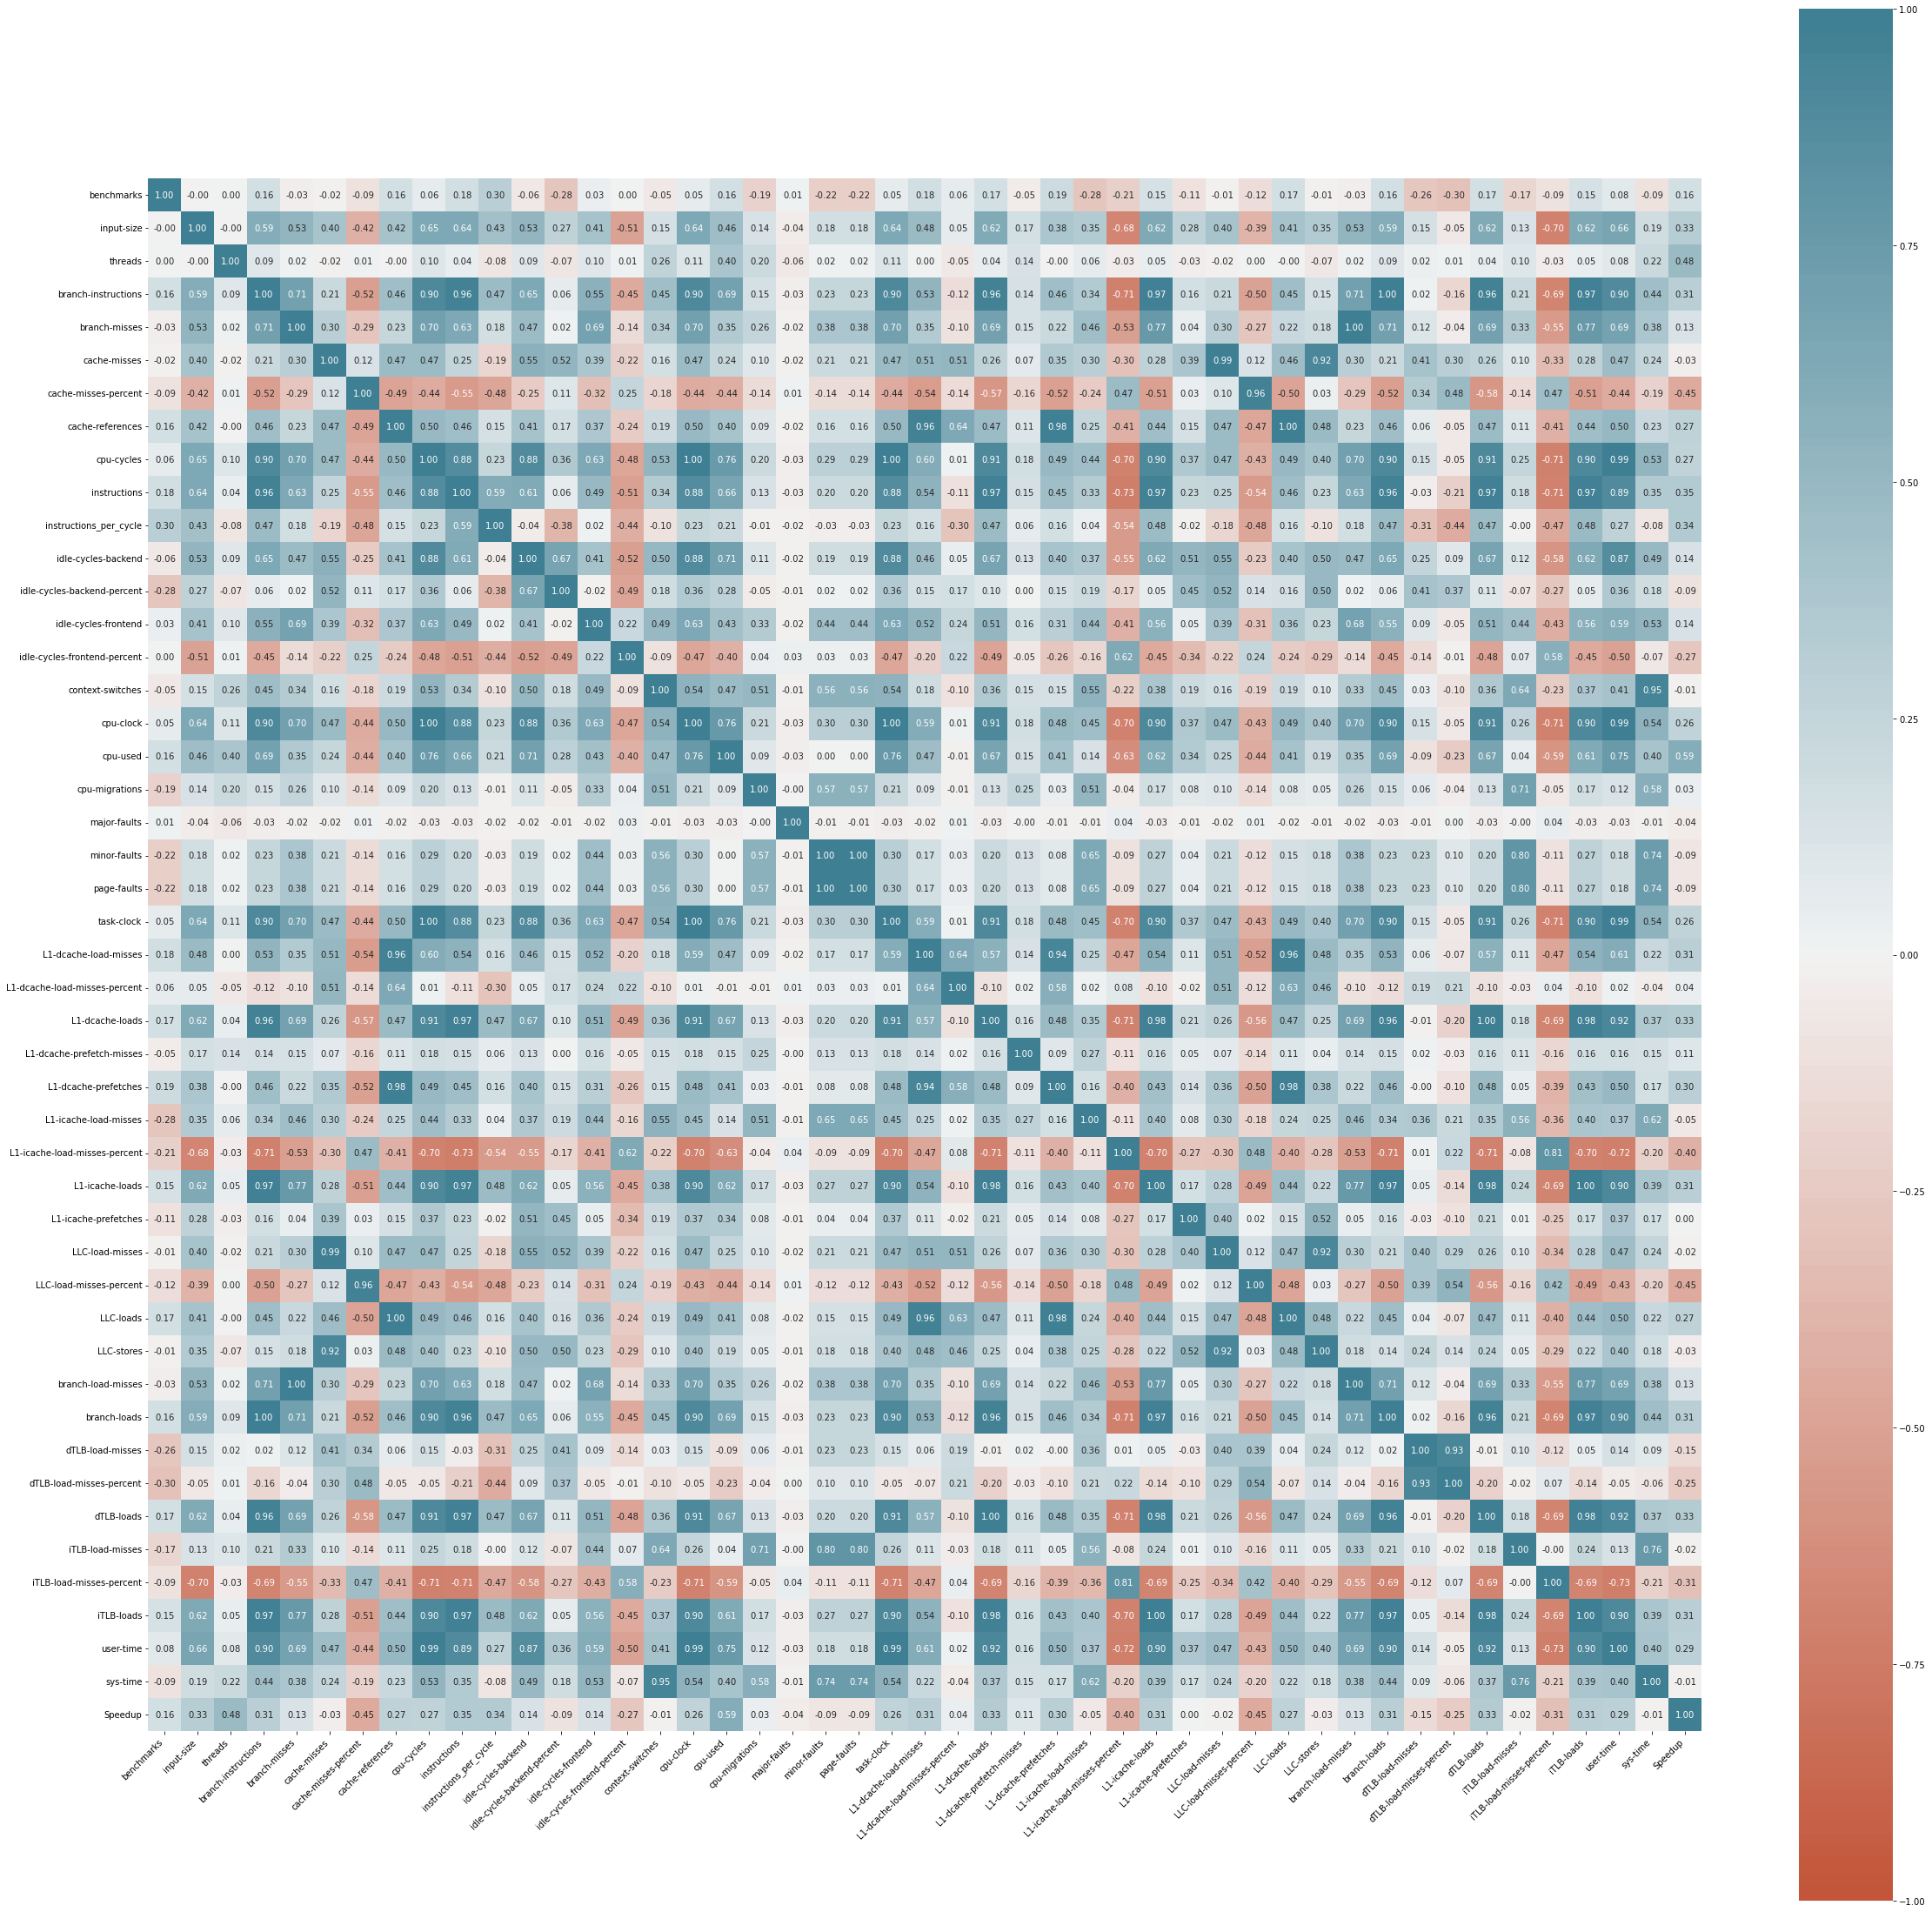

In [55]:
fig, ax = plt.subplots(figsize=(40, 40))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".2f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
unstack_corr = corr.unstack()

In [57]:
unstack_corr

benchmarks  benchmarks                  1.000000
            input-size                 -0.000033
            threads                     0.003950
            branch-instructions         0.156747
            branch-misses              -0.031056
                                          ...   
Speedup     iTLB-load-misses-percent   -0.313210
            iTLB-loads                  0.308468
            user-time                   0.292441
            sys-time                   -0.012256
            Speedup                     1.000000
Length: 2209, dtype: float64

In [58]:
output = ['Speedup']
lst = []

for i in output:
    print(i+' correlation')
    corr_table = unstack_corr[abs(unstack_corr)>0.15][i].drop(output, errors='ignore')
    lst = *lst,*corr_table.index
    print(corr_table)
    print('\n')

print('correlated variables')
print(set(lst))

Speedup correlation
benchmarks                       0.161697
input-size                       0.326748
threads                          0.483434
branch-instructions              0.309217
cache-misses-percent            -0.446363
cache-references                 0.268477
cpu-cycles                       0.265146
instructions                     0.348728
instructions_per_cycle           0.341358
idle-cycles-frontend-percent    -0.265406
cpu-clock                        0.264700
cpu-used                         0.586147
task-clock                       0.264415
L1-dcache-load-misses            0.308959
L1-dcache-loads                  0.330167
L1-dcache-prefetches             0.297089
L1-icache-load-misses-percent   -0.400638
L1-icache-loads                  0.308059
LLC-load-misses-percent         -0.452585
LLC-loads                        0.272453
branch-loads                     0.309356
dTLB-load-misses                -0.153461
dTLB-load-misses-percent        -0.245495
dTLB-loads    

In [59]:
new_data = data[[*set(lst),*output]]

In [60]:
# new_data

In [61]:
new_data.shape

(10411, 28)

In [62]:
# temporary code
# new_data = new_data.drop(columns='time',inplace=False)

In [63]:
new_data.to_csv('../data/preprocessed_data.csv',index=False)